**Data Analysis and Graphs**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [ ]:
PATH = '/content/drive/Shareddrives/STUDENT-EECS448Team1/rideshare2019/'

In [ ]:
dfs = []

for i in range(2, 13):
  print(i)
  df = pd.read_parquet(PATH + '/fhvhv_tripdata_2019-' + str(i) + '.parquet')
  df = df[df.driver_pay>0]
  df = df[df.tips > 0]
  df = df.sample(frac = 0.65, replace = False)
  cols_to_keep = ['tips', 'driver_pay', 'DOLocationID', 'PULocationID', 'tolls']
  df = df.loc[:, cols_to_keep]
  dfs.append(df)

rideshare_df = pd.concat(dfs, axis = 0)

print(rideshare_df.columns)

2
3
4
5
6
7
8
9
10
11
12
Index(['tips', 'driver_pay', 'DOLocationID', 'PULocationID', 'tolls'], dtype='object')


In [ ]:
print(len(rideshare_df))
df['tip_pct'] = df['tips']/(df['driver_pay'] + df['tips'] + df['tolls'])

19587100


In [ ]:
min_val = df['tip_pct'].min()
max_val = df['tip_pct'].max()
print(df.head(3))

          tips  driver_pay  DOLocationID  PULocationID  tolls   tip_pct
13253111  1.00        8.88           159           247    0.0  0.101215
19685775  4.96       31.42           164            37    0.0  0.136339
19408012  1.00       30.08           255            22    0.0  0.032175


In [ ]:
min_val, max_val

(4.657661853749418e-05, 0.9883970777825527)

In [ ]:
print(df.head(3))

          tips  driver_pay  DOLocationID  PULocationID  tolls   tip_pct
4806802    2.0        9.04             7           260    0.0  0.181159
15743914   1.0       17.17            72            37    0.0  0.055036
17513704   1.0        5.39           226           260    0.0  0.156495


In [ ]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1


In [ ]:
from sodapy import Socrata
client = Socrata("data.cityofnewyork.us", None)
results = client.get("755u-8jsi", limit=2000)
taxi_zone_df = pd.DataFrame.from_records(results)

In [ ]:
taxi_zone_df

,objectid,shape_leng,the_geom,shape_area,zone,location_id,borough
0,1,0.116357453189,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.0007823067885,Newark Airport,1,EWR
1,2,0.43346966679,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.00486634037837,Jamaica Bay,2,Queens
2,3,0.0843411059012,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.000314414156821,Allerton/Pelham Gardens,3,Bronx
3,4,0.0435665270921,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.000111871946192,Alphabet City,4,Manhattan
4,5,0.0921464898574,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.000497957489363,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...
258,256,0.0679149669603,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.000168611097013,Williamsburg (South Side),256,Brooklyn
259,259,0.126750305191,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.000394552487366,Woodlawn/Wakefield,259,Bronx
260,260,0.133514154636,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.000422345326907,Woodside,260,Queens
261,261,0.0271204563616,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",0.0000343423231652,World Trade Center,261,Manhattan


In [ ]:
tip_avg_by_zone = df.groupby('PULocationID')['tips'].mean()
tip_pct_by_zone = df.groupby('PULocationID')['tip_pct'].mean()
tip_avg_by_zone.index = tip_avg_by_zone.index.map(lambda x: x - 1)
tip_pct_by_zone.index = tip_pct_by_zone.index.map(lambda x: x-1)
taxi_zone_df['PU_tip_avg'] = tip_avg_by_zone
taxi_zone_df['PU_tip_pct'] = tip_pct_by_zone

In [ ]:
tip_avg_by_zone = df.groupby('DOLocationID')['tips'].mean()
tip_pct_by_zone = df.groupby('DOLocationID')['tip_pct'].mean()
tip_avg_by_zone.index = tip_avg_by_zone.index.map(lambda x: x - 1)
tip_pct_by_zone.index = tip_pct_by_zone.index.map(lambda x: x-1)
taxi_zone_df['DO_tip_avg'] = tip_avg_by_zone
taxi_zone_df['DO_tip_pct'] = tip_pct_by_zone

In [ ]:

print(taxi_zone_df)

    objectid       shape_leng  \
0          1   0.116357453189   
1          2    0.43346966679   
2          3  0.0843411059012   
3          4  0.0435665270921   
4          5  0.0921464898574   
..       ...              ...   
258      256  0.0679149669603   
259      259   0.126750305191   
260      260   0.133514154636   
261      261  0.0271204563616   
262      262  0.0490636231541   

                                              the_geom          shape_area  \
0    {'type': 'MultiPolygon', 'coordinates': [[[[-7...     0.0007823067885   
1    {'type': 'MultiPolygon', 'coordinates': [[[[-7...    0.00486634037837   
2    {'type': 'MultiPolygon', 'coordinates': [[[[-7...   0.000314414156821   
3    {'type': 'MultiPolygon', 'coordinates': [[[[-7...   0.000111871946192   
4    {'type': 'MultiPolygon', 'coordinates': [[[[-7...   0.000497957489363   
..                                                 ...                 ...   
258  {'type': 'MultiPolygon', 'coordinates': [[[[-7...   

<Figure size 640x480 with 0 Axes>

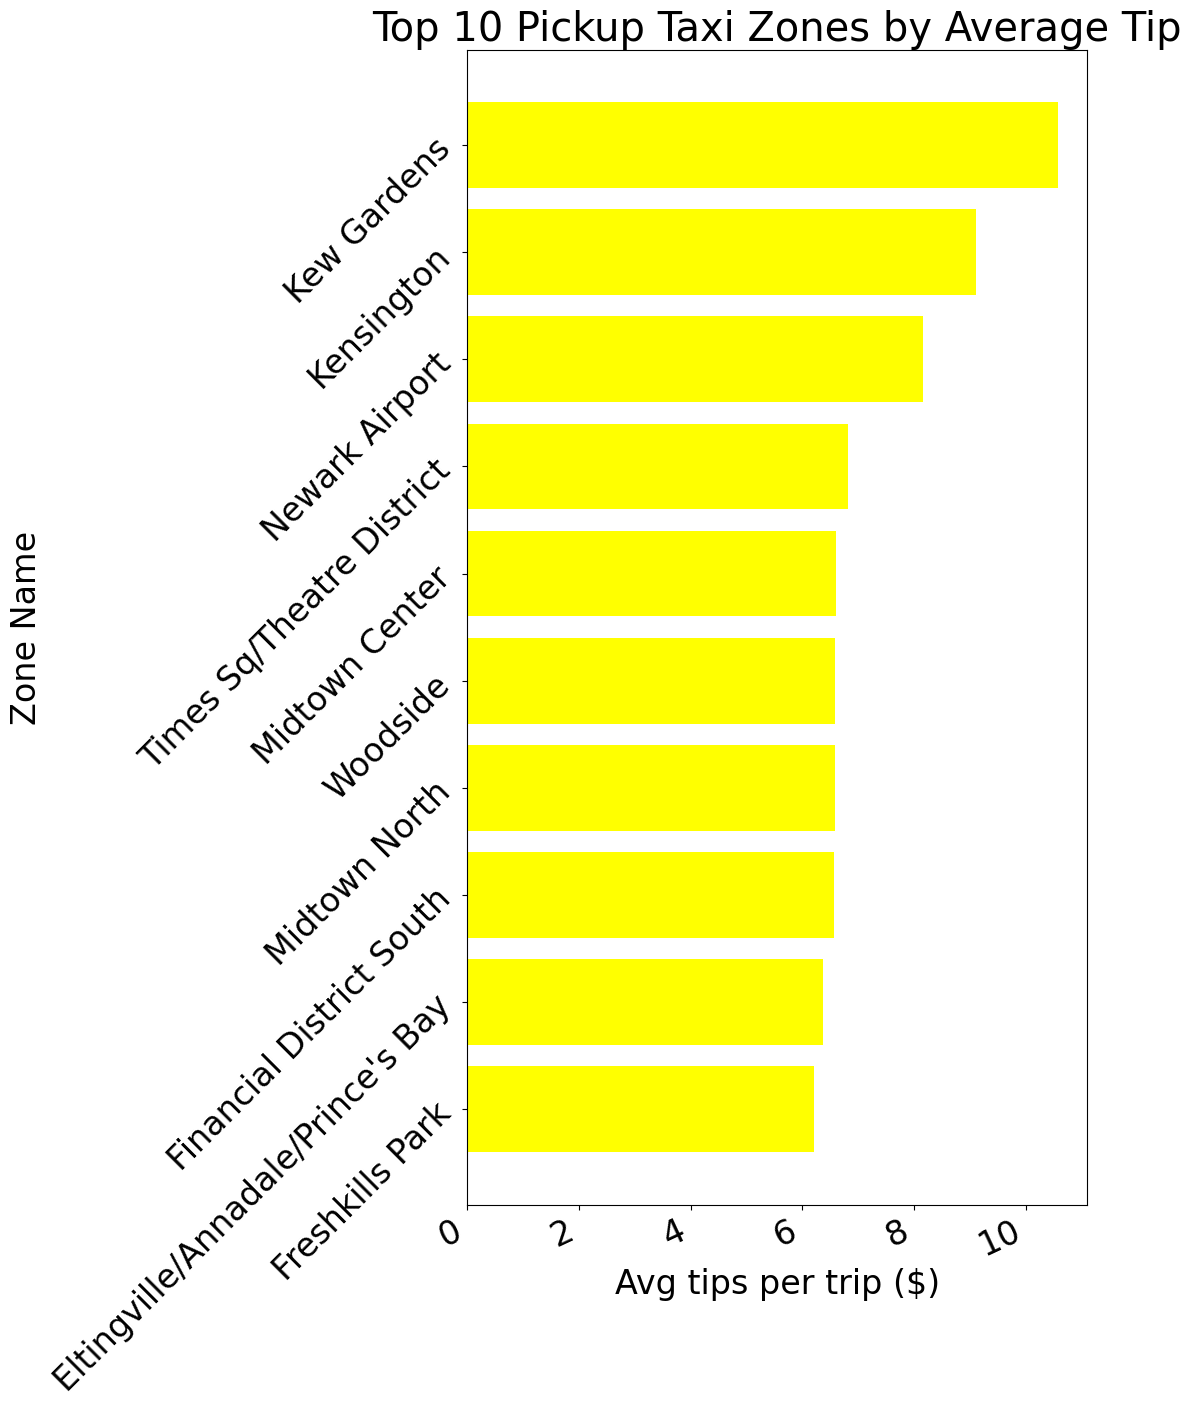

In [ ]:
#vertical graph
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='PU_tip_avg', ascending=False).head(10)
top10 = top10.iloc[::-1]

# Plot a bar chart of the top 10 values
plt.clf()
fig, ax = plt.subplots(figsize=(8, 15))
ax.set_title('Top 10 Pickup Taxi Zones by Average Tip')
ax.barh(top10['zone'], top10['PU_tip_avg'], color='yellow')
ax.set_xlabel('Avg tips per trip ($)')
ax.set_ylabel('Zone Name')
# Get the top 10 values of the 'tip_avg' column
plt.rc('font', size=24)
# Rotate the y-axis labels and set their alignment
plt.yticks(rotation=45, ha="right")
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()


<Figure size 640x480 with 0 Axes>

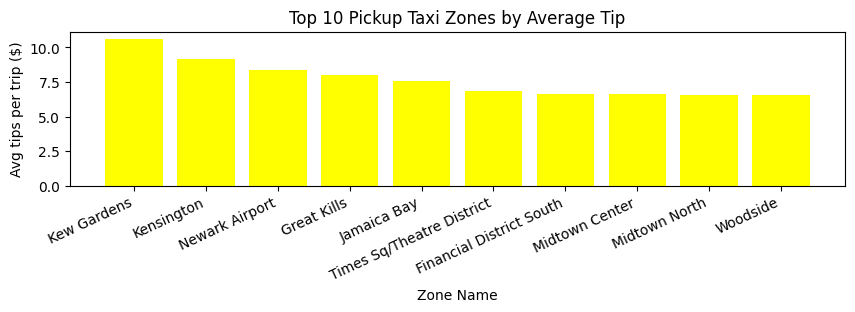

In [ ]:
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='PU_tip_avg', ascending=False).head(10)

# Plot a bar chart of the top 10 values
plt.clf()
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Top 10 Pickup Taxi Zones by Average Tip')
ax.bar(top10['zone'], top10['PU_tip_avg'], color='yellow' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tips per trip ($)')
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()


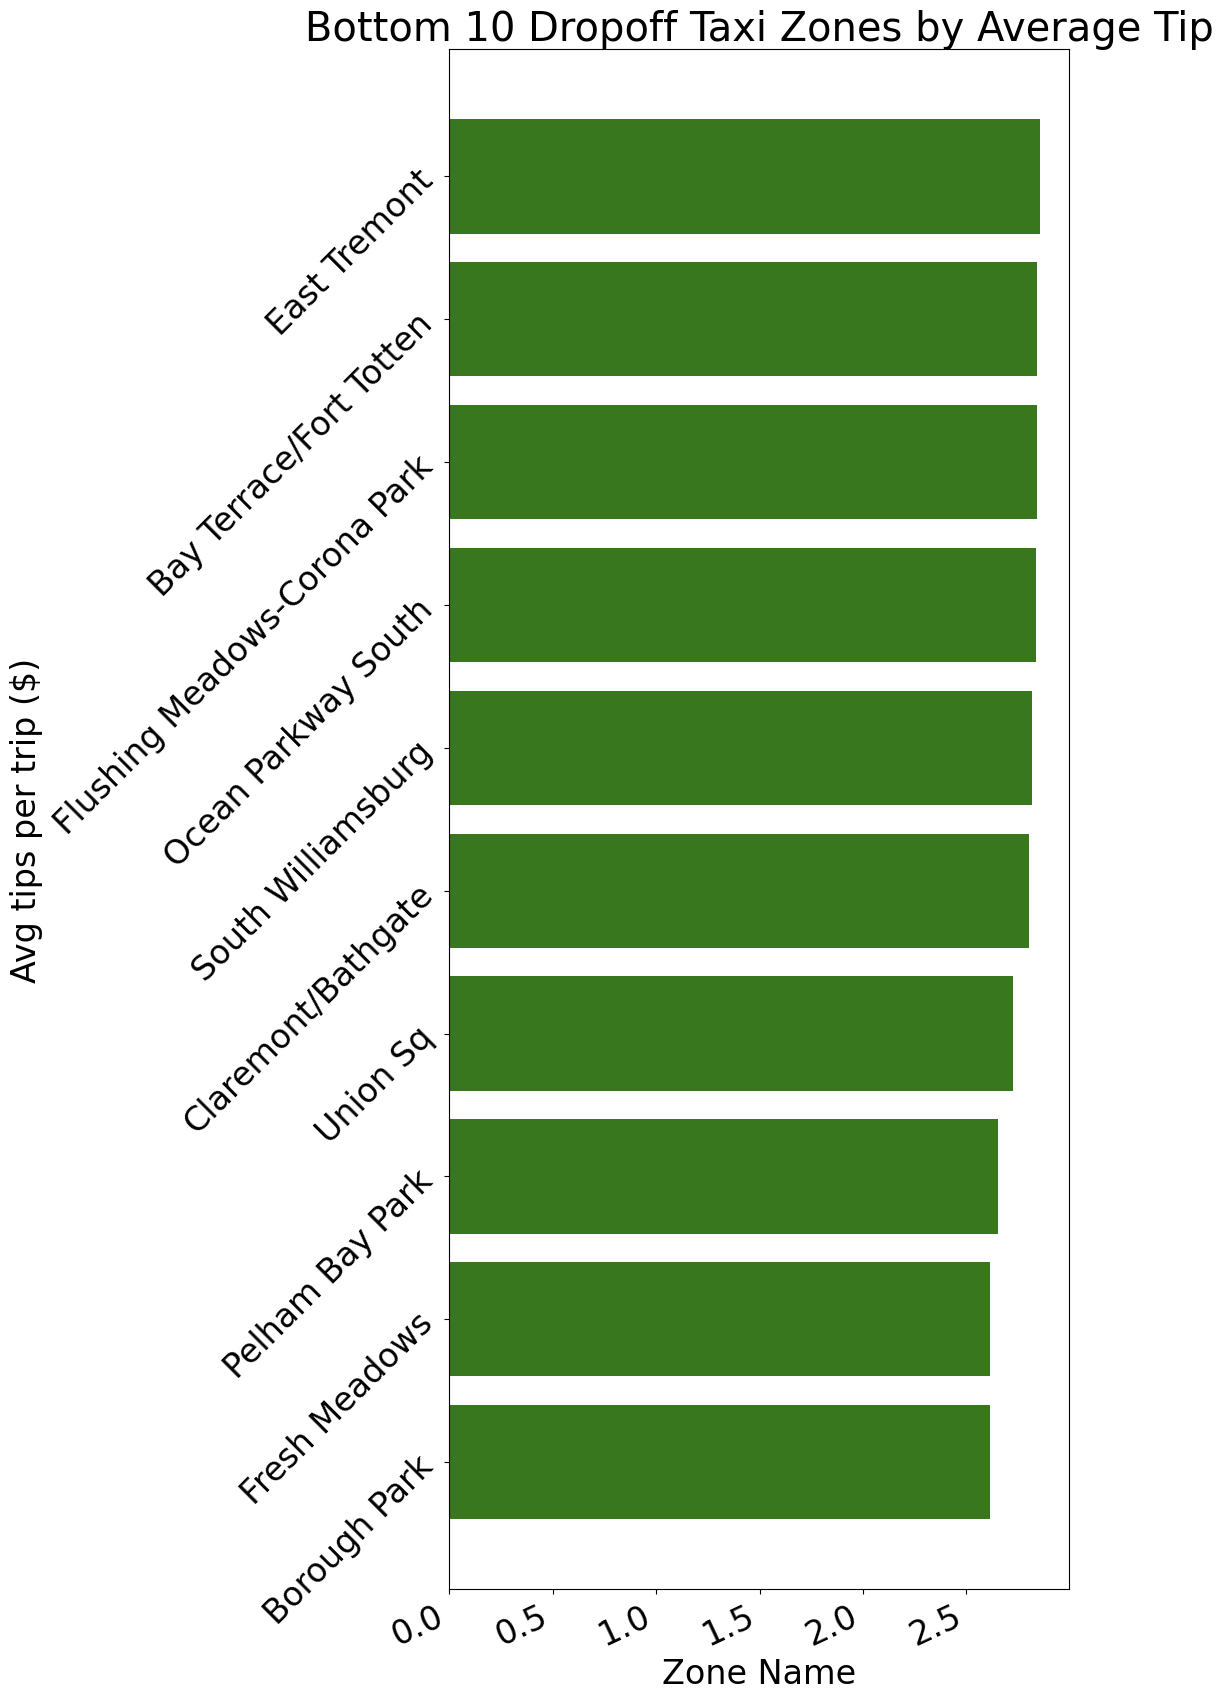

In [ ]:
#vertical


top10 = taxi_zone_df.sort_values(by='DO_tip_avg', ascending=False).tail(13)
top10 = top10.iloc[::-1]
# Plot a bar chart of the top 10 values

fig, ax = plt.subplots(figsize=(8, 20))
ax.set_title('Bottom 10 Dropoff Taxi Zones by Average Tip')
ax.barh(top10['zone'], top10['DO_tip_avg'], color='#38771d' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tips per trip ($)')
# Rotate the x-axis labels and set their alignment
plt.xticks(rotation=25, ha="right")

# Get the top 10 values of the 'tip_avg' column
plt.rc('font', size=24)
# Rotate the y-axis labels and set their alignment
plt.yticks(rotation=45, ha="right")
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()



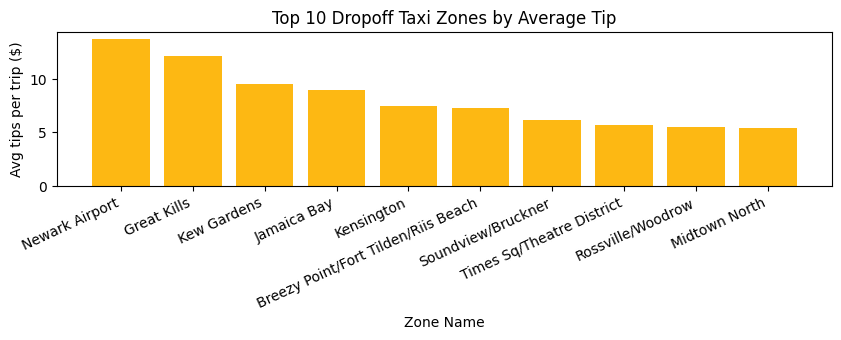

In [ ]:
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='DO_tip_avg', ascending=False).head(10)

# Plot a bar chart of the top 10 values
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Top 10 Dropoff Taxi Zones by Average Tip')
ax.bar(top10['zone'], top10['DO_tip_avg'], color='#fdb813' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tips per trip ($)')
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()




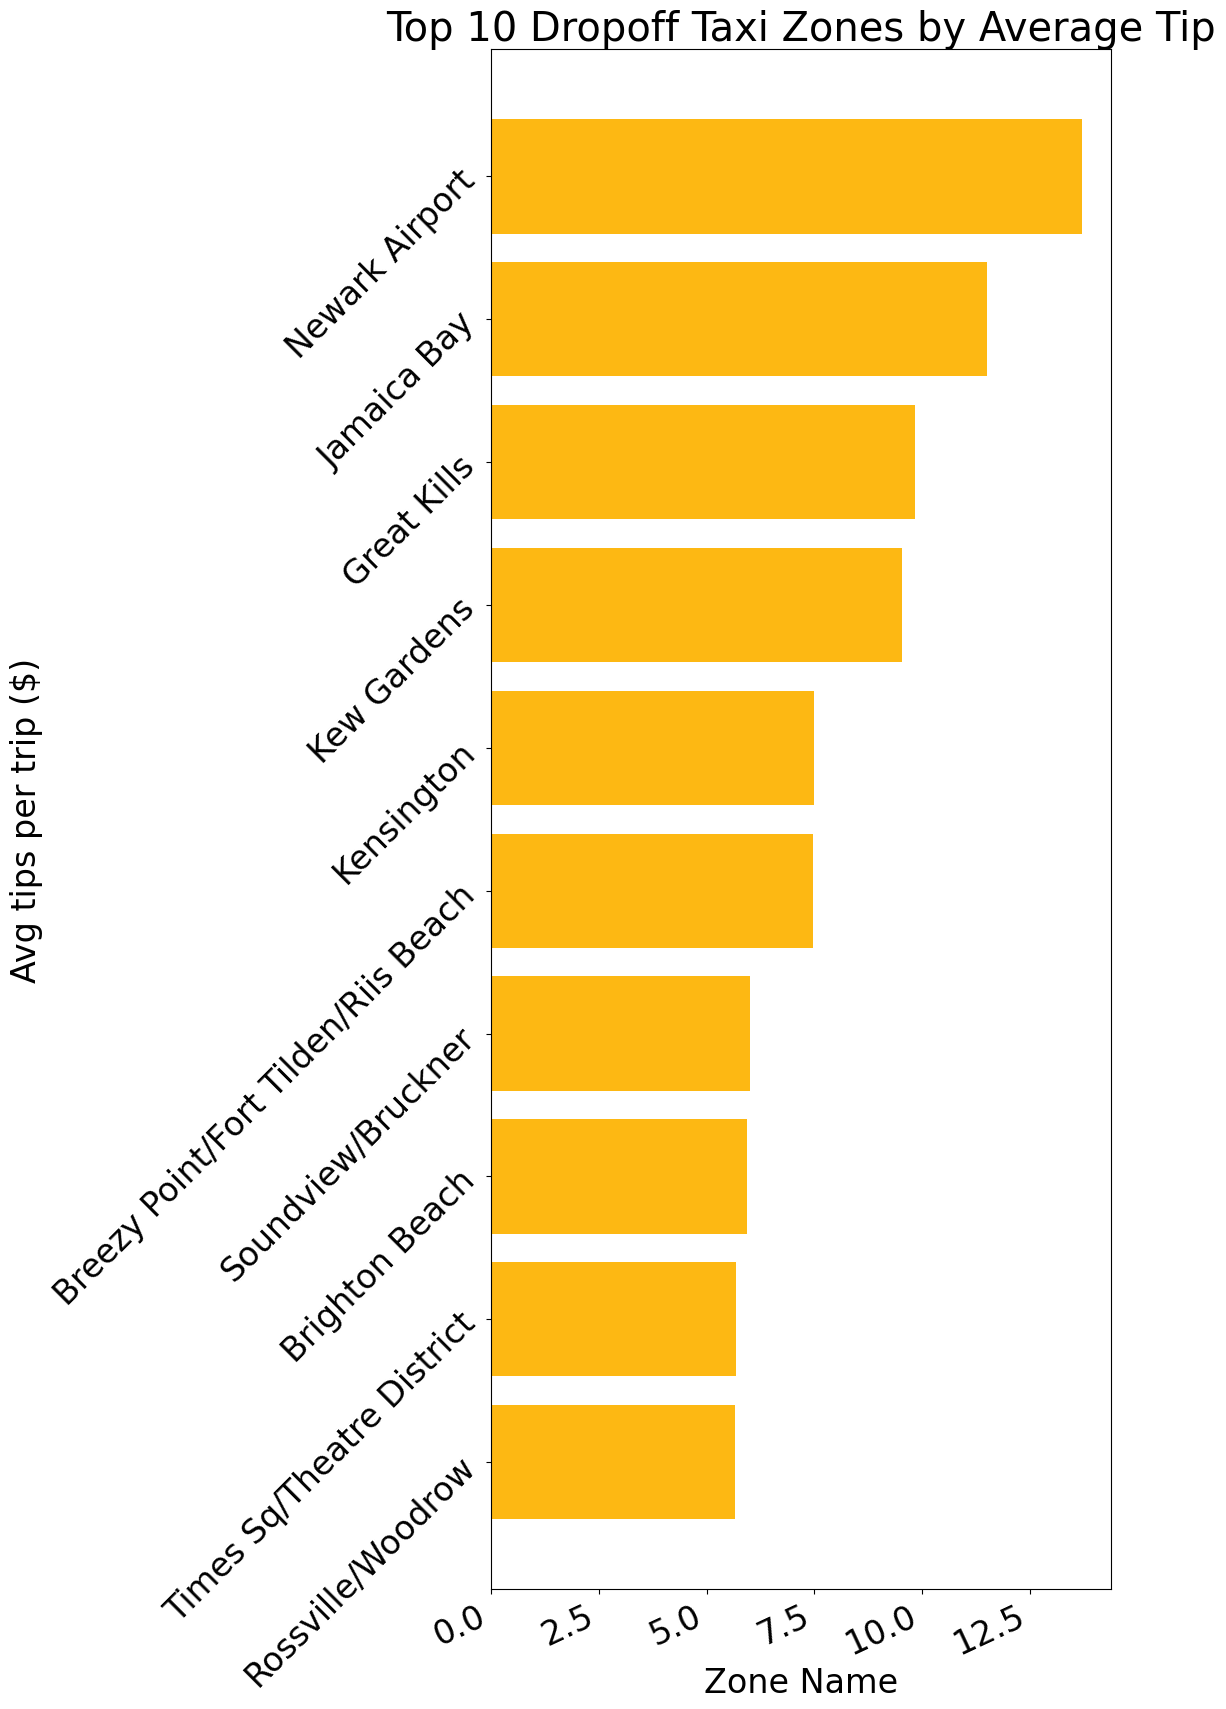

In [ ]:
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='DO_tip_avg', ascending=False).head(10)
top10 = top10.iloc[::-1]

# Plot a bar chart of the top 10 values
fig, ax = plt.subplots(figsize=(8, 20))
ax.set_title('Top 10 Dropoff Taxi Zones by Average Tip')
ax.barh(top10['zone'], top10['DO_tip_avg'], color='#fdb813' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tips per trip ($)')
plt.xticks(rotation=25,horizontalalignment="right")
# Get the top 10 values of the 'tip_avg' column
plt.rc('font', size=24)
# Rotate the y-axis labels and set their alignment
plt.yticks(rotation=45, ha="right")
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()




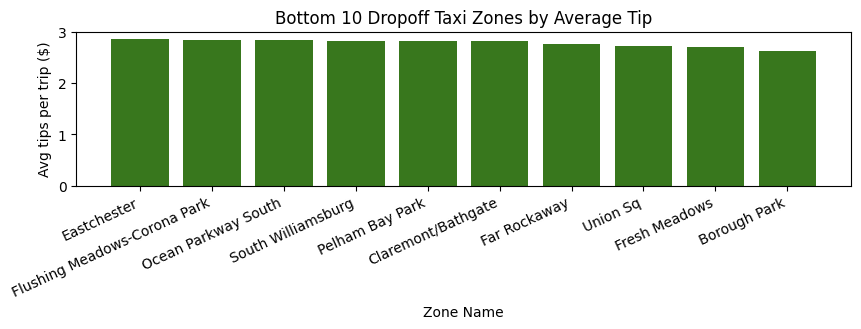

In [ ]:
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='DO_tip_avg', ascending=False).tail(13)
# Plot a bar chart of the top 10 values
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Bottom 10 Dropoff Taxi Zones by Average Tip')
ax.bar(top10['zone'], top10['DO_tip_avg'], color='#38771d' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tips per trip ($)')
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()



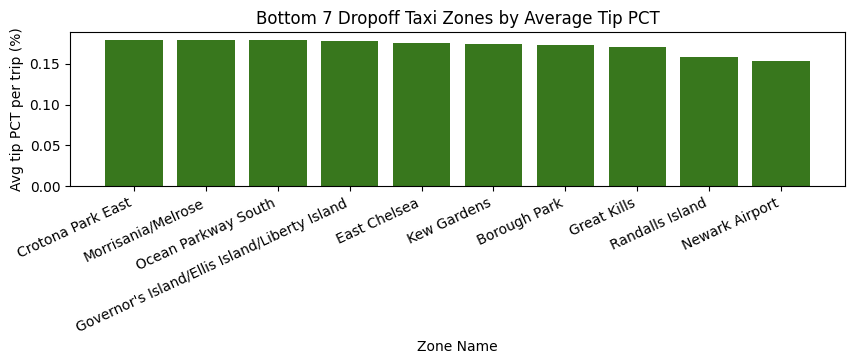

In [ ]:
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='DO_tip_pct', ascending=False).tail(13)
# Plot a bar chart of the top 10 values
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Bottom 7 Dropoff Taxi Zones by Average Tip PCT')
ax.bar(top10['zone'], top10['DO_tip_pct'], color='#38771d' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tip PCT per trip (%)')
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()

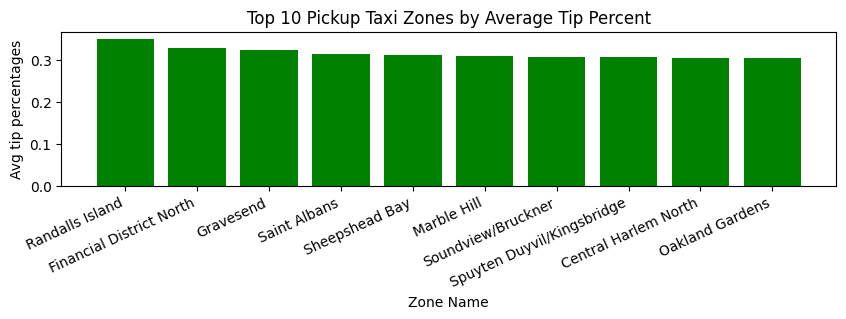

In [ ]:
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='PU_tip_pct', ascending=False).head(10)

# Plot a bar chart of the top 10 values
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Top 10 Pickup Taxi Zones by Average Tip Percent')
ax.bar(top10['zone'], top10['PU_tip_pct'], color='green' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tip percentages')
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()

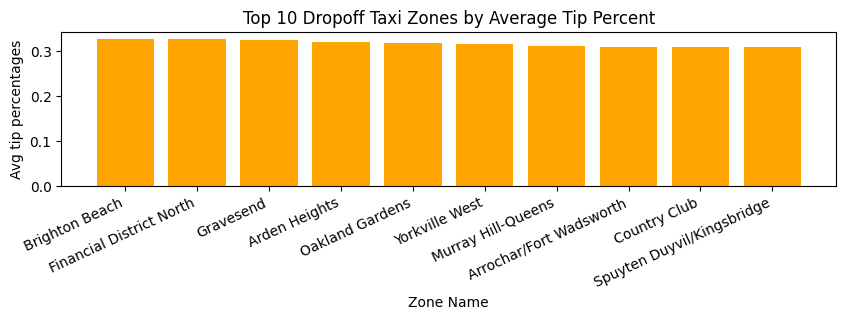

In [ ]:
# Get the top 10 values of the 'tip_avg' column
top10 = taxi_zone_df.sort_values(by='DO_tip_pct', ascending=False).head(10)

# Plot a bar chart of the top 10 values
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_title('Top 10 Dropoff Taxi Zones by Average Tip Percent')
ax.bar(top10['zone'], top10['DO_tip_pct'], color='orange' )
ax.set_xlabel('Zone Name')
ax.set_ylabel('Avg tip percentages')
plt.xticks(rotation=25,horizontalalignment="right")
plt.show()

In [ ]:
print(taxi_zone_df.head(3))

  objectid       shape_leng  \
0        1   0.116357453189   
1        2    0.43346966679   
2        3  0.0843411059012   

                                            the_geom         shape_area  \
0  {'type': 'MultiPolygon', 'coordinates': [[[[-7...    0.0007823067885   
1  {'type': 'MultiPolygon', 'coordinates': [[[[-7...   0.00486634037837   
2  {'type': 'MultiPolygon', 'coordinates': [[[[-7...  0.000314414156821   

                      zone location_id borough   tip_avg   tip_pct  
0           Newark Airport           1     EWR  8.600000  0.222457  
1              Jamaica Bay           2  Queens  6.965000  0.227974  
2  Allerton/Pelham Gardens           3   Bronx  3.189176  0.268136  


In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.2 MB/s eta 0:00:00


In [ ]:
gpd_taxi_zones = gpd.read_file(PATH + 'zone_data.shp')
# df = pd.read_parquet(PATH + '/fhvhv_tripdata_2019-' + str(i) + '.parquet')


In [ ]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
all_locs=[]
for i in range(1,263):
  all_locs.append(i)
missing_locs = set(all_locs) - set(df['PULocationID'].unique())
print(missing_locs)

{104, 199, 103}


In [ ]:
print(df.columns)

Index(['tips', 'driver_pay', 'DOLocationID', 'PULocationID', 'tip_pct'], dtype='object')


In [ ]:
tip_avg_by_zone = df.groupby('PULocationID')['tips'].mean()
tip_pct_by_zone = df.groupby('PULocationID')['tip_pct'].mean()
print(tip_avg_by_zone.mean())

4.069263574302778


In [ ]:
tip_avg_by_zone = df.groupby('PULocationID')['tips'].mean()
tip_pct_by_zone = df.groupby('PULocationID')['tip_pct'].mean()
for missing_loc in missing_locs:
  tip_avg_by_zone[missing_loc] = tip_avg_by_zone.mean()
  tip_pct_by_zone[missing_loc] = tip_pct_by_zone.mean()
# Decrease all the indexes by 1
tip_avg_by_zone.index = tip_avg_by_zone.index.map(lambda x: x - 1)
tip_pct_by_zone.index = tip_pct_by_zone.index.map(lambda x: x-1)
print(tip_avg_by_zone[0]
      )
gpd_taxi_zones['PU_tip_avg'] = tip_avg_by_zone
gpd_taxi_zones['PU_tip_pct'] = tip_pct_by_zone

9.315


In [ ]:
print(gpd_taxi_zones['PU_tip_avg'].max())

10.547403197309322


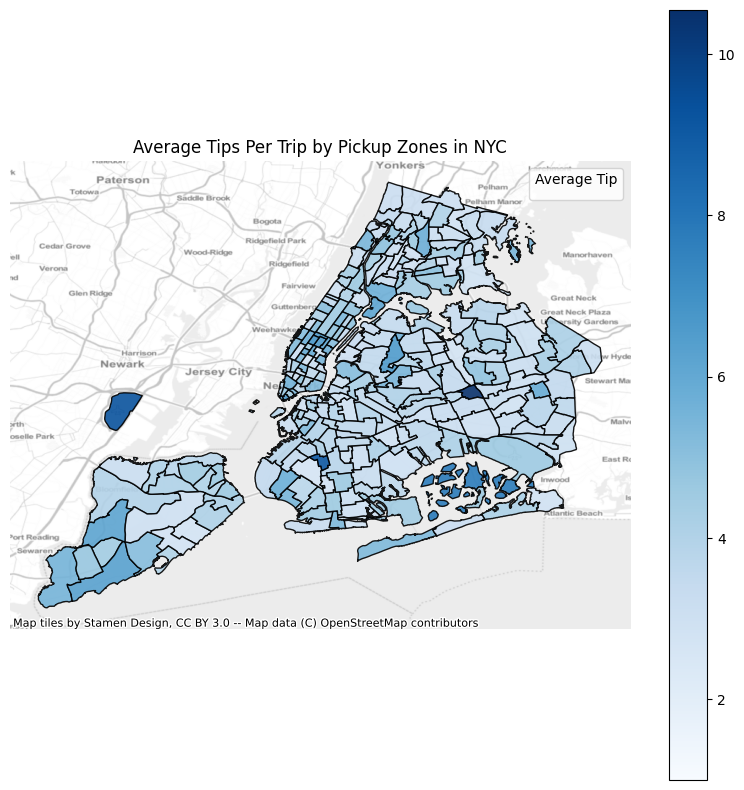

In [ ]:
# Define a color map
# ax = gpd_taxi_zones.plot(figsize = (10,10), alpha =0.7, edgecolor ='k', column='PU_tip_avg', cmap='Blues', legend=True)
# Define a color map with a narrower range of values
ax = gpd_taxi_zones.plot(figsize = (10,10), alpha =0.9, edgecolor ='k', column='PU_tip_avg', cmap='Blues', legend=True,)

# Set the title of the plot
ax.set_title("Taxi Zone Pick-up Average Tip Amounts")

# Remove the axes
ax.set_axis_off()

if gpd_taxi_zones.crs is None:
    gpd_taxi_zones.set_crs(epsg=4326, inplace=True)
# ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), alpha=0.5, source=ctx.providers.Stamen.TonerLite)
plt.title('Average Tips Per Trip by Pickup Zones in NYC')
plt.legend(title='Average Tip')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

13.7465033037238


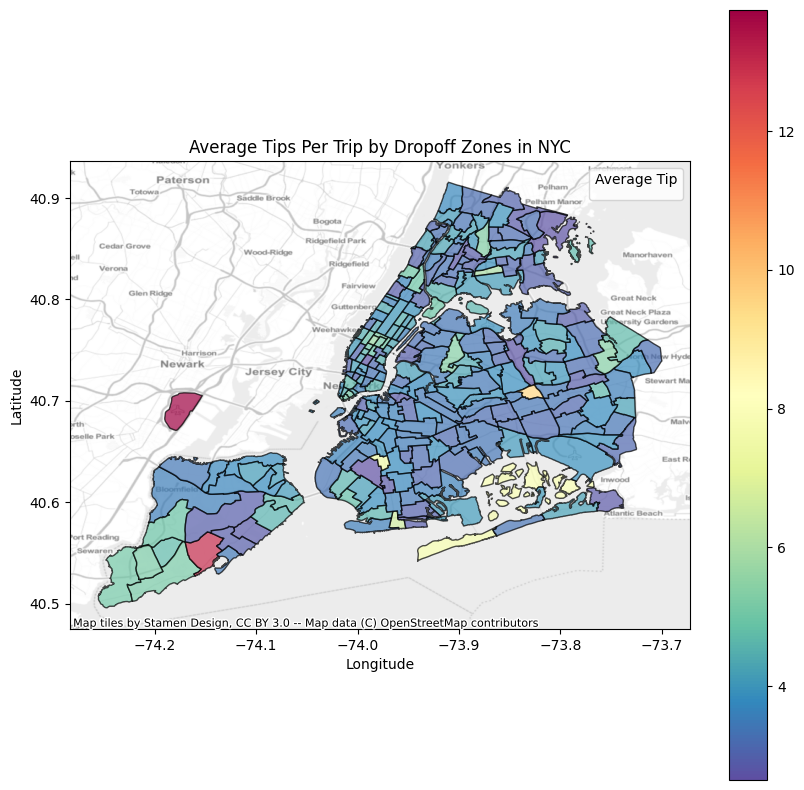

In [ ]:
# Define a color map
tip_avg_by_zone = df.groupby('DOLocationID')['tips'].mean()
tip_pct_by_zone = df.groupby('DOLocationID')['tip_pct'].mean()
for missing_loc in missing_locs:
  tip_avg_by_zone[missing_loc] = tip_avg_by_zone.mean()
  tip_pct_by_zone[missing_loc] = tip_pct_by_zone.mean()
# Decrease all the indexes by 1
tip_avg_by_zone.index = tip_avg_by_zone.index.map(lambda x: x - 1)
tip_pct_by_zone.index = tip_pct_by_zone.index.map(lambda x: x-1)
print(tip_avg_by_zone[0]
      )
gpd_taxi_zones['DO_tip_avg'] = tip_avg_by_zone
gpd_taxi_zones['DO_tip_pct'] = tip_pct_by_zone
ax = gpd_taxi_zones.plot(figsize = (10,10), alpha =0.7, edgecolor ='k', column='DO_tip_avg', cmap='Spectral_r', legend=True)
if gpd_taxi_zones.crs is None:
    gpd_taxi_zones.set_crs(epsg=4326, inplace=True)
# ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), alpha=0.5, source=ctx.providers.Stamen.TonerLite)
plt.title('Average Tips Per Trip by Dropoff Zones in NYC')
plt.legend(title='Average Tip')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
print(gpd_taxi_zones['DO_tip_avg'])
print(gpd_taxi_zones['PU_tip_avg'])

0      13.746503
1       7.775000
2       3.167571
3       3.646350
4       4.725151
         ...    
258     3.773458
259     3.034675
260     5.336520
261     4.457433
262     4.246379
Name: DO_tip_avg, Length: 263, dtype: float64
0      8.600000
1      6.965000
2      3.189176
3      4.046102
4      4.420898
         ...   
258    3.530962
259    3.160203
260    6.594016
261    4.689815
262    5.017393
Name: PU_tip_avg, Length: 263, dtype: float64


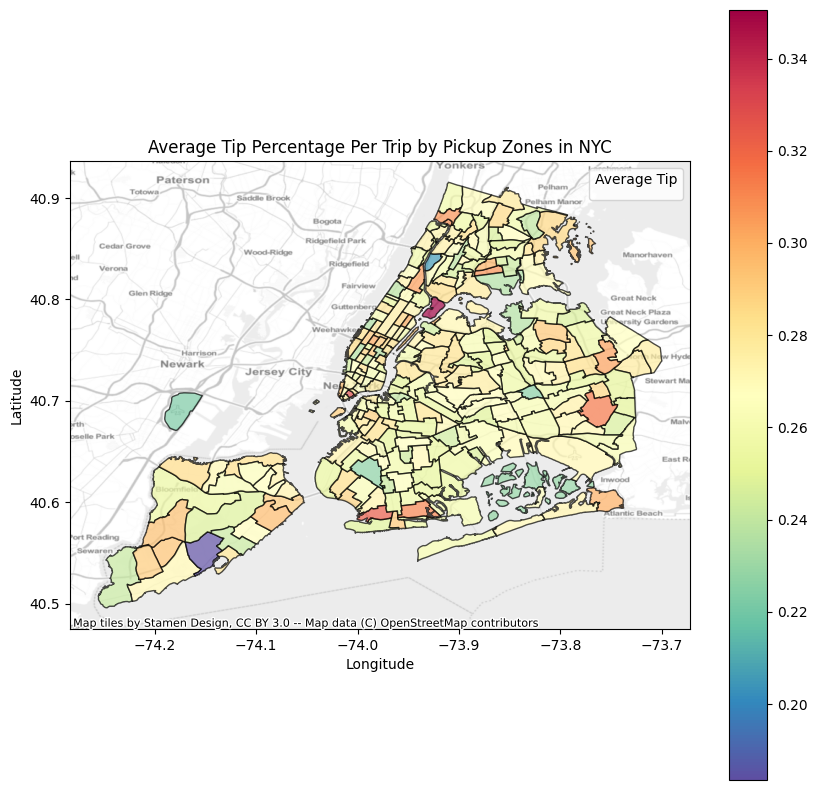

In [ ]:
ax = gpd_taxi_zones.plot(figsize = (10,10), alpha =0.7, edgecolor ='k', column='PU_tip_pct', cmap='Spectral_r', legend=True)
if gpd_taxi_zones.crs is None:
    gpd_taxi_zones.set_crs(epsg=4326, inplace=True)
# ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), alpha=0.5, source=ctx.providers.Stamen.TonerLite)
plt.title('Average Tip Percentage Per Trip by Pickup Zones in NYC')
plt.legend(title='Average Tip')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

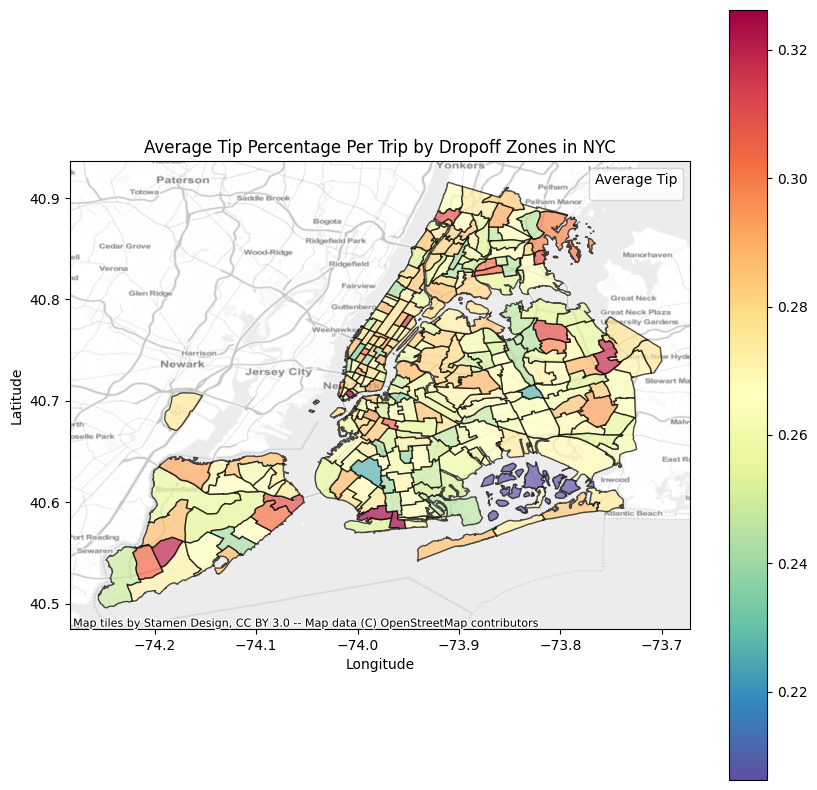

In [ ]:
ax = gpd_taxi_zones.plot(figsize = (10,10), alpha =0.7, edgecolor ='k', column='DO_tip_pct', cmap='Spectral_r', legend=True)
if gpd_taxi_zones.crs is None:
    gpd_taxi_zones.set_crs(epsg=4326, inplace=True)
# ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ctx.add_basemap(ax, crs=gpd_taxi_zones.crs.to_string(), alpha=0.5, source=ctx.providers.Stamen.TonerLite)
plt.title('Average Tip Percentage Per Trip by Dropoff Zones in NYC')
plt.legend(title='Average Tip')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()